# Alessandro Pomponio - 0000920265

1. The data are split in two files, load the files and merge them
according to the first column, which is the index; both the files
contain a "class" column, keep both the columns in the merged
file calling them "class_x" and "class_y" (you can use the merge
function of pandas dataframes) (4pt)
2. Delete all the rows where class_x is different from class_y, then
drop class_y and rename class_x as class (4pt)
3. Reorder the columns in alphabetical order, but placing the class
column as the last one; the cleaned dataframe must be named
df; show its size and head (4pt)
4. Find the best classification scheme using three classification
methods
5. For each classification method find the best parameter setting
with cross validation on the training set (6pt)
6. For each classification method compute the accuracy and the
confusion matrix on the test set (4pt)
7. Produce a plot of the accuracies given by the methods
attempted (3pt)

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Variables
first_file_name = 'exam_1.csv'
second_file_name = 'exam_2.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

## 1. The data are split in two files, load the files and merge them according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes) (4pt)

In [3]:
# Load the first file
first_df = pd.read_csv(first_file_name, delimiter = separator, index_col = 0)

# Load the second file
second_df = pd.read_csv(second_file_name, delimiter = separator, index_col = 0)

# Merge the two dataframes with the 'outer' how, as to perform a SQL-like full outer join
# on the two indexes, adding suffixes as requested (default option)
df = first_df.merge(second_df, how = 'outer', left_index = True, right_index = True, suffixes = ('_x', '_y'))

In [4]:
df

,A,C,E,class_x,B,D,F,class_y
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469,1
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013,1
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869,0
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123,2
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858,2
...,...,...,...,...,...,...,...,...
1995,-1.668710,1.258125,-1.111517,0,-1.114765,-1.209808,1.546161,0
1996,0.842932,-0.862210,-0.658845,2,1.188689,-0.174914,-1.376579,2
1997,1.371652,0.861149,-0.966656,0,0.929550,0.616987,-0.643962,0
1998,2.091386,-0.164420,-1.185916,0,1.918095,0.557593,-0.942563,0


## 2. Delete all the rows where class_x is different from class_y, then drop class_y and rename class_x as class (4pt)

In [5]:
# Find all the indexes of the rows where class_x is different from class_y
indexes_to_delete = df[df['class_x'] != df['class_y']].index

# Drop those rows from the dataframe
df = df.drop(index = indexes_to_delete, axis = 0)

# Drop class_y
df = df.drop(columns = 'class_y', axis = 1)

# Rename class_x as class
df = df.rename(columns = {'class_x': 'class'})

In [6]:
df

,A,C,E,class,B,D,F
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858
...,...,...,...,...,...,...,...
1995,-1.668710,1.258125,-1.111517,0,-1.114765,-1.209808,1.546161
1996,0.842932,-0.862210,-0.658845,2,1.188689,-0.174914,-1.376579
1997,1.371652,0.861149,-0.966656,0,0.929550,0.616987,-0.643962
1998,2.091386,-0.164420,-1.185916,0,1.918095,0.557593,-0.942563


## 3. Reorder the columns in alphabetical order, but placing the class column as the last one; the cleaned dataframe must be named df; show its size and head (4pt)

In [7]:
target = 'class'

# Get the column names
column_names = list(df.columns)

# Remove the class column
column_names.remove(target)

# Sort the values
column_names.sort()

# Append class because we want it last
column_names.append(target)

# Reindex the dataframe                                                 #       QUI MODIFICA DAVVERO IL DATASET e riordina
df = df.reindex(columns = column_names)

In [8]:
df

,A,B,C,D,E,F,class
0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2
...,...,...,...,...,...,...,...
1995,-1.668710,-1.114765,1.258125,-1.209808,-1.111517,1.546161,0
1996,0.842932,1.188689,-0.862210,-0.174914,-0.658845,-1.376579,2
1997,1.371652,0.929550,0.861149,0.616987,-0.966656,-0.643962,0
1998,2.091386,1.918095,-0.164420,0.557593,-1.185916,-0.942563,0


In [9]:
# Show the size of the dataframe
print(f"The dataframe has size: {df.size}")

The dataframe has size: 13888


In [10]:
# Show the head of the dataframe
df.head()

,A,B,C,D,E,F,class
0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2


## 4. Find the best classification scheme using three classification methods

We will use Decision Trees, Linear Perceptron and K-nearest Neighbors.

Let's start by dividing our data into the feature matrix and the class labels

In [11]:
X = df.drop(target, axis = 1)
y = df[target]

We will now split the data into a training and a test set in order to see how well the classifiers perform

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = random_state)

### Decision Tree

In [13]:
# Instantiate the DecisionTree Classifier
dt = DecisionTreeClassifier(random_state = random_state)

# Fit it to the training data
dt.fit(Xtrain, ytrain)

# Try to predict training data
dt_train_prediction = dt.predict(Xtrain)

# Try to predict test data
dt_test_prediction = dt.predict(Xtest)

# Compute the accuracy score for the predictions
dt_train_accuracy = accuracy_score(ytrain, dt_train_prediction) * 100
dt_test_accuracy = accuracy_score(ytest, dt_test_prediction) * 100

### Linear Perceptron

In [14]:
# Instantiate the Linear Perceptron
lp = Perceptron(random_state = random_state)

# Fit it to the training data
lp.fit(Xtrain, ytrain)

# Try to predict training data
lp_train_prediction = lp.predict(Xtrain)

# Try to predict test data
lp_test_prediction = lp.predict(Xtest)

# Compute the accuracy score for the predictions
lp_train_accuracy = accuracy_score(ytrain, lp_train_prediction) * 100
lp_test_accuracy = accuracy_score(ytest, lp_test_prediction) * 100

### K-nearest Neighbors

In [15]:
# Instantiate the KNN Classifier
knn = KNeighborsClassifier()

# Fit it to the training data
knn.fit(Xtrain, ytrain)

# Try to predict training data
knn_train_prediction = knn.predict(Xtrain)

# Try to predict test data
knn_test_prediction = knn.predict(Xtest)

# Compute the accuracy score for the predictions
knn_train_accuracy = accuracy_score(ytrain, knn_train_prediction) * 100
knn_test_accuracy = accuracy_score(ytest, knn_test_prediction) * 100

Let's see how well the classifiers have performed using their default hyperparameters

In [16]:
print(f"The decision tree had an accuracy of {dt_train_accuracy:.2f} on the training set and {dt_test_accuracy:.2f} on the test set")
print(f"The linear perceptron had an accuracy of {lp_train_accuracy:.2f} on the training set and {lp_test_accuracy:.2f} on the test set")
print(f"The knn classifier had an accuracy of {knn_train_accuracy:.2f} on the training set and {knn_test_accuracy:.2f} on the test set")

The decision tree had an accuracy of 100.00 on the training set and 81.85 on the test set
The linear perceptron had an accuracy of 74.13 on the training set and 74.80 on the test set
The knn classifier had an accuracy of 90.32 on the training set and 88.10 on the test set


The linear perceptron behaved very oddly, having a higher accuracy on the test set, compared to the training one. The KNN classifier behaved the best overall, reaching a higher accuracy on the test set data. The decision tree shows signs of overfitting

## 5. For each classification method find the best parameter setting with cross validation on the training set (6pt)

Let's prepare a few support structures that will help us in iterating over the classifiers for cross validation

In [17]:
# Model labels to facilitate iterations
model_lbls = ['dt', 'lp', 'knn']

# We will evaluate classification via the precision metric
score = 'precision'

# Parameters for each classifier
tuned_param_dt = [{'max_depth': list(range(1,dt.get_depth() + 1)), 'random_state': [random_state]}]
tuned_param_lp = [{'early_stopping': [True], 'random_state': [random_state]}]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# set the models to be fitted specifying name, estimator and parameter structure
models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
    }
}


To help us in this part, we will introduce this function we've used in one of the exercises during class

In [18]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print()

We will now iterate on the models with GridSearchCV to find which one is the best performing

In [19]:
results_short = {}

for m in model_lbls:
    print('-'*40)
    print("Trying model {}".format(models[m]['name']))
    clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                        scoring='%s_macro' % score,  
                        return_train_score = False,
                        n_jobs = 2,
                    )
    
    clf.fit(Xtrain, ytrain)
    print_results(clf)
    results_short[m] = clf.best_score_
    
print("Summary of results for {}".format(score))
print("Estimator")
for m in results_short.keys():
    print("{}\t - score: {:5.2f}%".format(models[m]['name'], results_short[m]*100))

----------------------------------------
Trying model Decision Tree       
Best parameters set found on train set:

{'max_depth': 7, 'random_state': 42}

Grid scores on train set:

0.432 (+/-0.022) for {'max_depth': 1, 'random_state': 42}
0.814 (+/-0.040) for {'max_depth': 2, 'random_state': 42}
0.814 (+/-0.043) for {'max_depth': 3, 'random_state': 42}
0.826 (+/-0.039) for {'max_depth': 4, 'random_state': 42}
0.815 (+/-0.050) for {'max_depth': 5, 'random_state': 42}
0.827 (+/-0.045) for {'max_depth': 6, 'random_state': 42}
0.833 (+/-0.056) for {'max_depth': 7, 'random_state': 42}
0.828 (+/-0.045) for {'max_depth': 8, 'random_state': 42}
0.825 (+/-0.033) for {'max_depth': 9, 'random_state': 42}
0.830 (+/-0.041) for {'max_depth': 10, 'random_state': 42}
0.822 (+/-0.045) for {'max_depth': 11, 'random_state': 42}
0.827 (+/-0.054) for {'max_depth': 12, 'random_state': 42}
0.823 (+/-0.053) for {'max_depth': 13, 'random_state': 42}
0.811 (+/-0.042) for {'max_depth': 14, 'random_state': 42}
0.

As we can see, the KNN classifier performed once again the best, followed by the decision tree and the linear perceptron

## 6. For each classification method compute the accuracy and the confusion matrix on the test set (4pt)

Let's instantiate the classifiers with the best parameters we've found in the previous step:

In [20]:
dt = DecisionTreeClassifier(max_depth = 7, random_state = random_state)
lp = Perceptron(early_stopping = True, random_state = random_state)
knn = KNeighborsClassifier(n_neighbors = 9)


### Decision Tree

In [21]:
dt.fit(Xtrain, ytrain)
dt_pred = dt.predict(Xtest)
dt_accuracy = accuracy_score(ytest, dt_pred) * 100
dt_cm = confusion_matrix(ytest, dt_pred)

In [22]:
print(f"The accuracy of the DT classifier was {dt_accuracy:.2f}%")

The accuracy of the DT classifier was 82.46%


In [23]:
print("The DT confusion matrix was:")
print(dt_cm)

The DT confusion matrix was:
[[120  18  14]
 [ 23 134  16]
 [ 10   6 155]]


### Linear Perceptron

In [24]:
lp.fit(Xtrain, ytrain)
lp_pred = lp.predict(Xtest)
lp_accuracy = accuracy_score(ytest, lp_pred) * 100
lp_cm = confusion_matrix(ytest, lp_pred)

In [25]:
print(f"The accuracy of the LP classifier was {lp_accuracy:.2f}%")

The accuracy of the LP classifier was 70.16%


In [26]:
print("The LP confusion matrix was:")
print(lp_cm)

The LP confusion matrix was:
[[ 98  48   6]
 [ 28 122  23]
 [ 16  27 128]]


### KNN

In [51]:
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn_accuracy = accuracy_score(ytest, knn_pred) * 100
knn_cm = confusion_matrix(ytest, knn_pred)

In [52]:
print(f"The accuracy of the KNN classifier was {knn_accuracy:.2f}%")

The accuracy of the KNN classifier was 86.29%


In [53]:
print("The KNN confusion matrix was:")
print(knn_cm)

The KNN confusion matrix was:
[[122  18  12]
 [ 13 145  15]
 [  6   4 161]]


In [77]:
#Codice adattato da marco lorenzo per stampa ridotta e sistemata; (non salva precision e recall in strutture dati ma li stampa alla fine)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_lbls = [
              'dt', 
              'lp', 
             'knn'
            ]

# Set the parameters by cross-validation

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(max_depth = 5, random_state = random_state), 
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(early_stopping=True, random_state=random_state),
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(n_neighbors=5),
       }
}

dictModel_pred = {}
dictModel_accuracy = {} 
dictModel_cm = {}


def multipleClassifiers(model):
    model.fit(Xtrain, ytrain)
    model_pred = model.predict(Xtest)
    model_accuracy = accuracy_score(ytest, model_pred) * 100
    model_cm = confusion_matrix(ytest, model_pred)

    dictModel_pred[model] = model_pred
    dictModel_accuracy[model] = model_accuracy
    dictModel_cm[model] = model_cm
    
    
for model_lb in model_lbls:
    model = models[model_lb]["estimator"]
    multipleClassifiers(model)
    print("\n"+str(model)+":")
    print("Accuracy: "+str(dictModel_accuracy[model]))
    print("Confusion matrix: ")
    print(dictModel_cm[model])
    print("Classification report: ")
    print(classification_report(ytest, dictModel_pred[model]))


DecisionTreeClassifier(max_depth=5, random_state=42):
Accuracy: 83.46774193548387
Confusion matrix: 
[[117  18  17]
 [ 17 140  16]
 [  6   8 157]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       152
           1       0.84      0.81      0.83       173
           2       0.83      0.92      0.87       171

    accuracy                           0.83       496
   macro avg       0.84      0.83      0.83       496
weighted avg       0.84      0.83      0.83       496


Perceptron(early_stopping=True, random_state=42):
Accuracy: 70.16129032258065
Confusion matrix: 
[[ 98  48   6]
 [ 28 122  23]
 [ 16  27 128]]
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       152
           1       0.62      0.71      0.66       173
           2       0.82      0.75      0.78       171

    accuracy                           0.70       496
   macr

### 7. Produce a plot of the accuracies given by the methods attempted (3pt)

<BarContainer object of 3 artists>

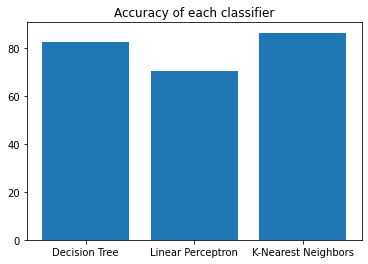

In [30]:
classifier_list = ['Decision Tree', 'Linear Perceptron', 'K-Nearest Neighbors']
acc_list = [dt_accuracy, lp_accuracy, knn_accuracy]
plt.title('Accuracy of each classifier')
plt.bar(classifier_list, acc_list)